In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [4]:
loss = pd.read_csv('./GustAnalyticNebula561/loss.dat', delimiter=' ', header=None)

steps = loss.iloc[:, 0]

loss1 = loss[1]
loss2 = loss[2]
loss3 = loss[3]
loss4 = loss[4]
loss5 = loss[5]
loss6 = loss[6]
loss7 = loss[7]
loss8 = loss[8]
loss9 = loss[9]
loss10 = loss[10]
loss11 = loss[11]

training_losses = loss.iloc[:, 1:12]
test_losses = loss.iloc[:, 12:]

In [5]:
loss

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.067285,0.072681,0.000187,0.000197,0.001600,0.000035,4.841666,1.023762,0.914490,...,0.070802,0.000273,0.000275,0.002236,0.000050,4.841666,1.023762,0.914490,0.494717,1.046148
1,50.0,0.001084,0.000780,0.000384,0.001432,0.000678,0.000105,0.625893,0.003098,0.002045,...,0.000727,0.000349,0.001372,0.000600,0.000115,0.625893,0.003098,0.002045,0.521066,0.001676
2,100.0,0.000083,0.000032,0.000084,0.000008,0.000094,0.000026,0.579930,0.001480,0.001216,...,0.000040,0.000108,0.000009,0.000108,0.000036,0.579930,0.001480,0.001216,0.563727,0.000003
3,150.0,0.000110,0.000069,0.000105,0.000005,0.000092,0.000038,0.580442,0.001939,0.000888,...,0.000092,0.000138,0.000006,0.000118,0.000049,0.580442,0.001939,0.000888,0.559223,0.000012
4,200.0,0.000153,0.000251,0.000075,0.000013,0.000119,0.000033,0.577397,0.004238,0.000766,...,0.000340,0.000104,0.000014,0.000151,0.000043,0.577397,0.004238,0.000766,0.551103,0.000094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,79600.0,0.000537,0.000124,0.000031,0.000063,0.000248,0.000014,0.000207,0.000209,0.000049,...,0.000121,0.000031,0.000088,0.000205,0.000017,0.000207,0.000209,0.000049,0.000030,0.000004
811,79700.0,0.000555,0.000531,0.000040,0.000072,0.000253,0.000023,0.000127,0.000192,0.000072,...,0.000369,0.000053,0.000083,0.000208,0.000026,0.000127,0.000192,0.000072,0.000038,0.000004
812,79800.0,0.000271,0.000064,0.000027,0.000056,0.000252,0.000009,0.000150,0.000205,0.000034,...,0.000065,0.000033,0.000074,0.000208,0.000012,0.000150,0.000205,0.000034,0.000035,0.000004
813,79900.0,0.001511,0.000213,0.000035,0.000069,0.000258,0.000018,0.000142,0.000188,0.000051,...,0.000149,0.000033,0.000095,0.000216,0.000021,0.000142,0.000188,0.000051,0.000058,0.000004


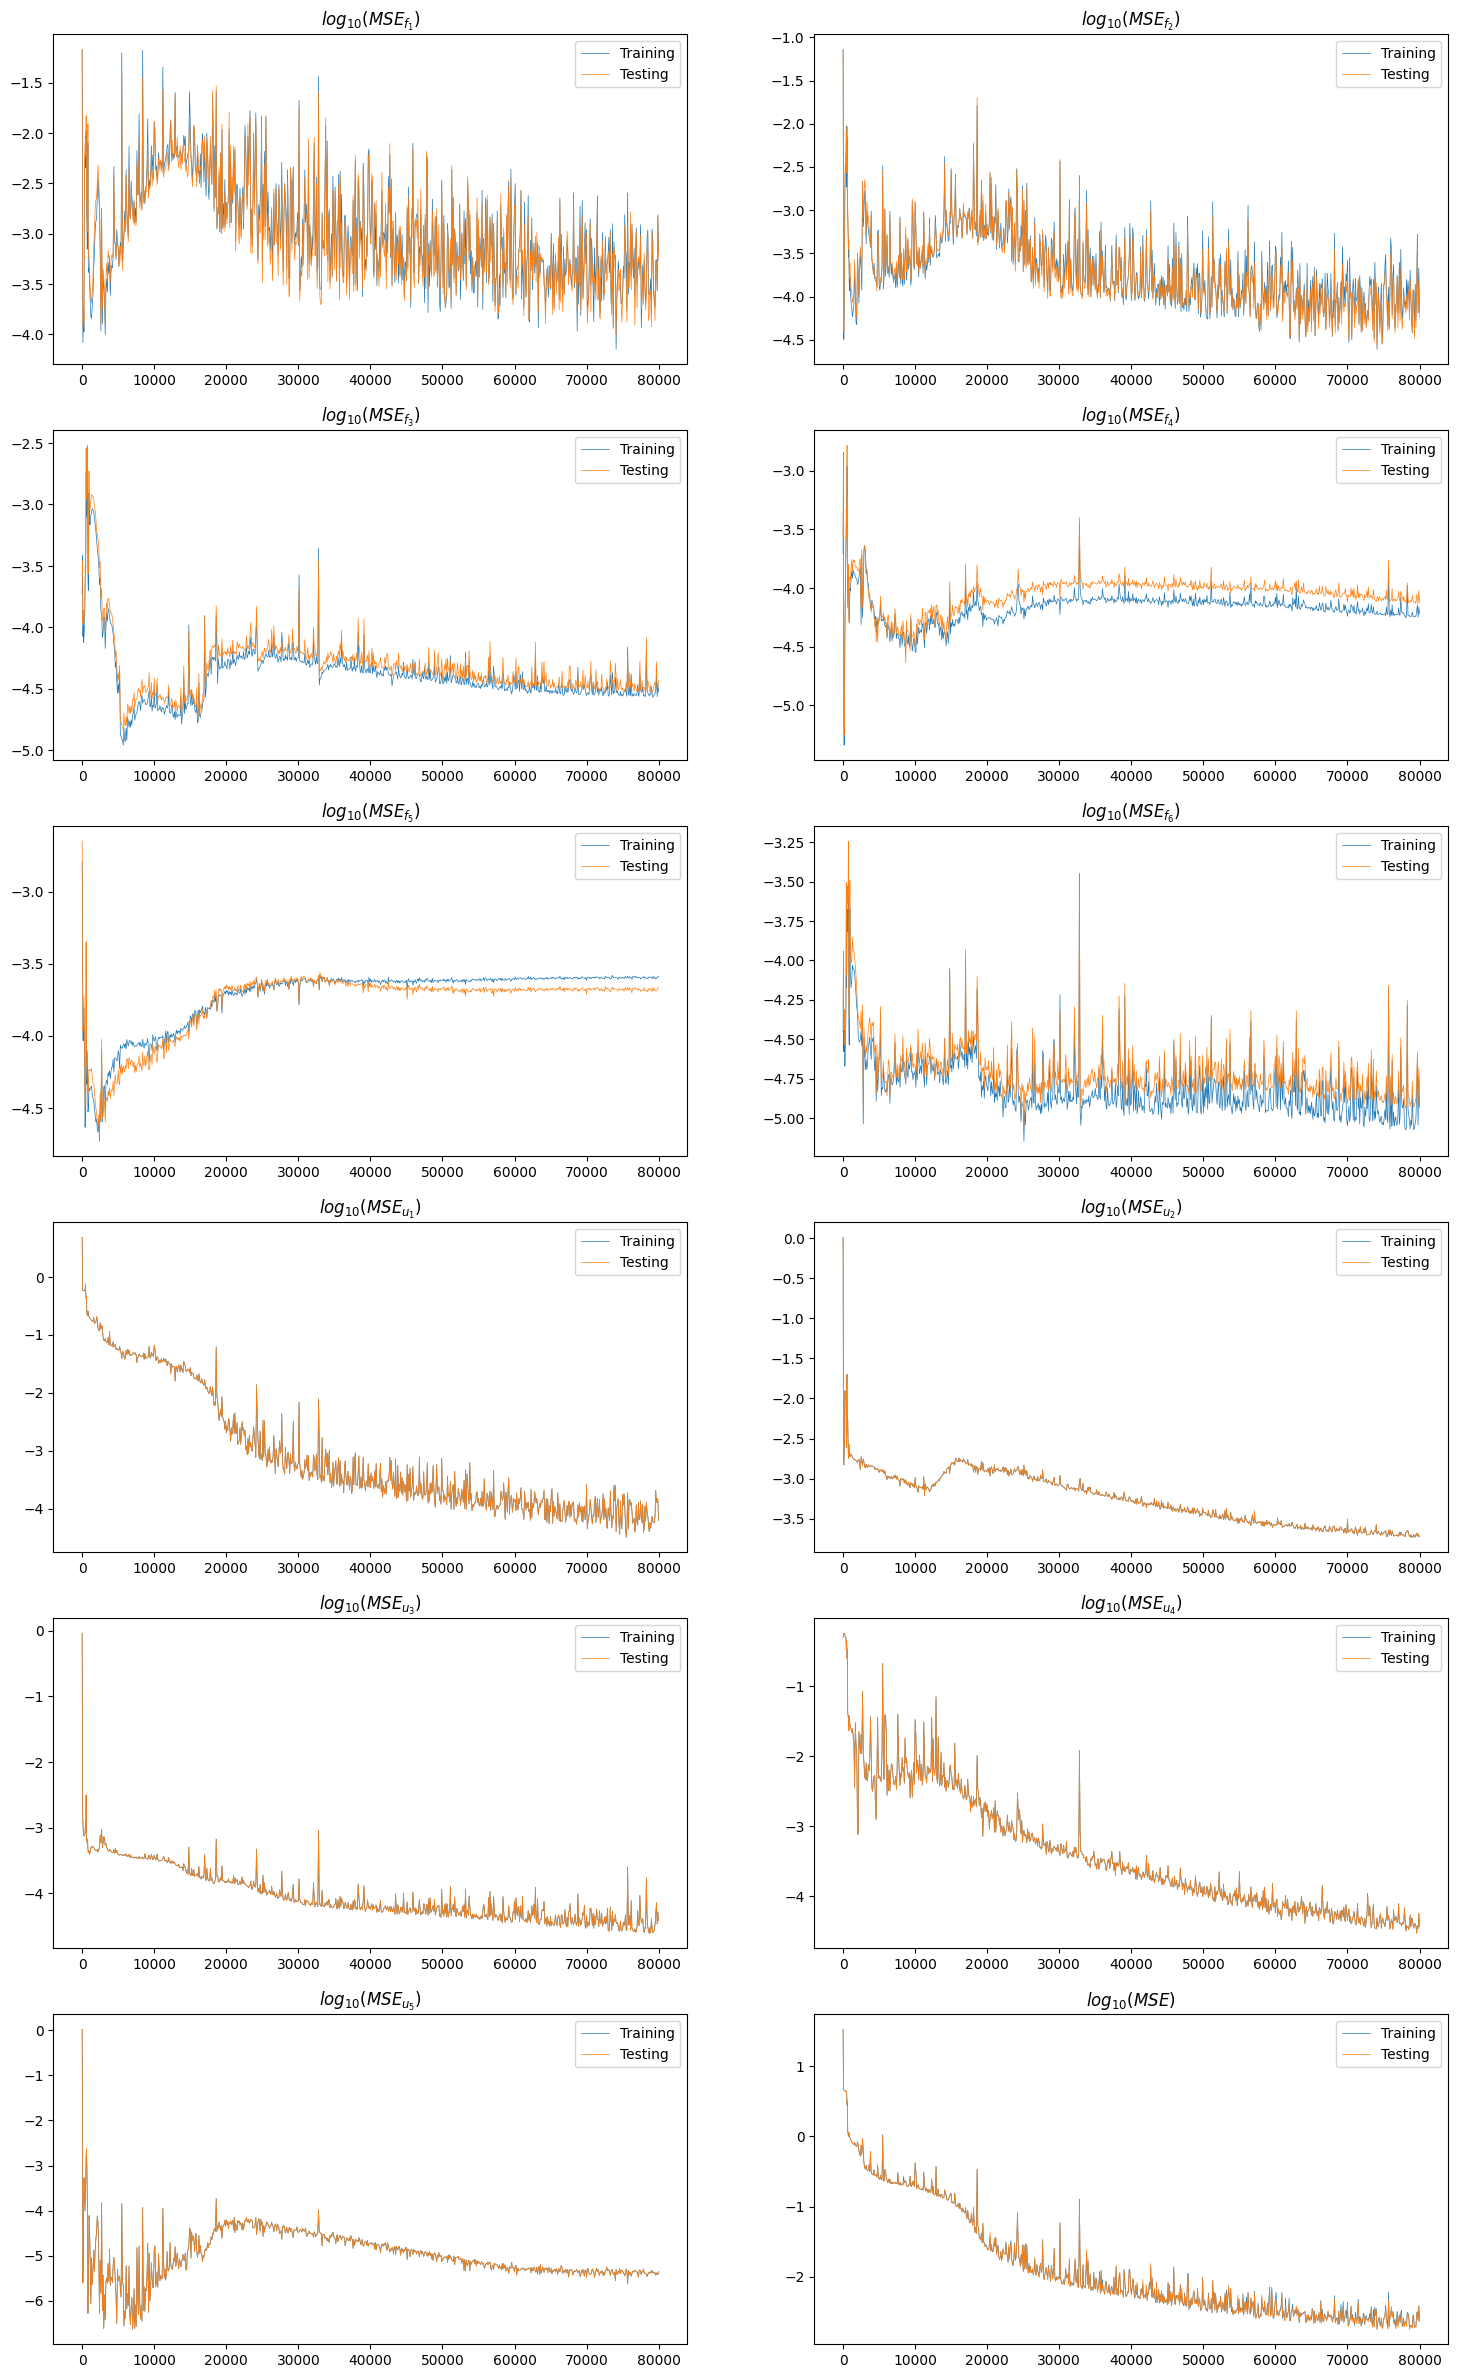

In [6]:
fig, axs = plt.subplots(6, 2, figsize=(18, 30))

linewidth = 0.5

labels = ["$log_{10}(MSE_{f_1})$", 
          "$log_{10}(MSE_{f_2})$",
          "$log_{10}(MSE_{f_3})$",
          "$log_{10}(MSE_{f_4})$",
          "$log_{10}(MSE_{f_5})$",
          "$log_{10}(MSE_{f_6})$",
          "$log_{10}(MSE_{u_1})$",
          "$log_{10}(MSE_{u_2})$",
          "$log_{10}(MSE_{u_3})$",
          "$log_{10}(MSE_{u_4})$",
          "$log_{10}(MSE_{u_5})$"]

for i in range(len(training_losses.columns.values)):
    axs_index = int(i/2), i%2
    axs[axs_index].plot(steps, np.log10(loss[training_losses.columns[i]]), linewidth=linewidth, label='Training')
    axs[axs_index].plot(steps, np.log10(loss[test_losses.columns[i]]), linewidth=linewidth, label='Testing')
    axs[axs_index].set_title(labels[i])
    axs[axs_index].legend()

loss_weights = [1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4]
axs_index = -1, -1
axs[axs_index].plot(steps, np.log10(np.dot(training_losses, loss_weights)), linewidth=linewidth, label='Training')
axs[axs_index].plot(steps, np.log10(np.dot(test_losses, loss_weights)), linewidth=linewidth, label='Testing')
axs[axs_index].set_title('$log_{10}(MSE)$')
axs[axs_index].legend()
plt.savefig('losses_hybrid.png', dpi=600)
plt.show()